In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Zoo.csv")

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C64D0B5BE0>,
      dtype=object)

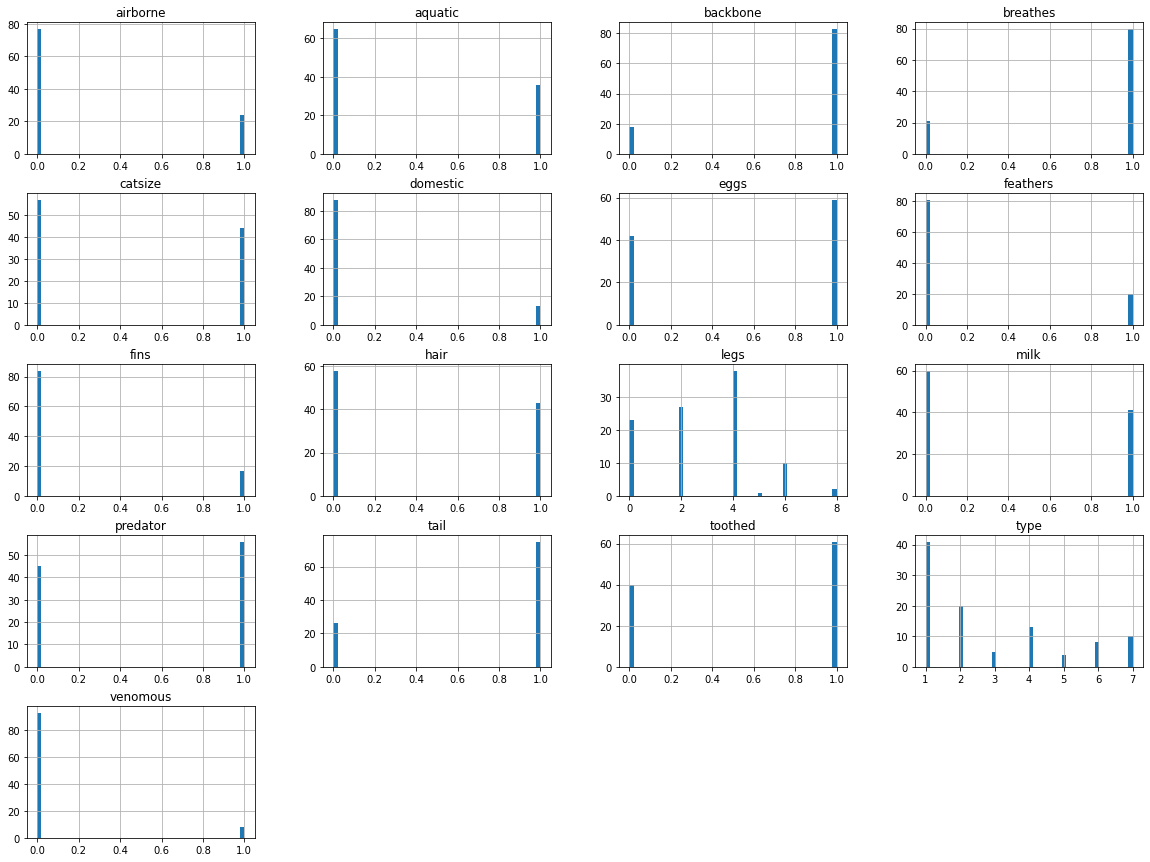

In [6]:
df.hist(bins=50, figsize=(20,15))

## Train|Test Split and Scaling Data

In [10]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

### Grid Search for Algorithm Tuning

In [12]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
y=df['type'].values
X=df.drop(['type','animal name'],axis=1).values

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [41]:
acc=[]
for i in range(3, 50, 2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_acc = np.mean(neigh.predict(X_train) == y_train)
    test_acc = np.mean(neigh.predict(X_test) == y_test)
    acc.append([train_acc, test_acc])

In [42]:
acc

[[0.9857142857142858, 0.9354838709677419],
 [0.9142857142857143, 0.8709677419354839],
 [0.8857142857142857, 0.8064516129032258],
 [0.8285714285714286, 0.8064516129032258],
 [0.7857142857142857, 0.6451612903225806],
 [0.7571428571428571, 0.6451612903225806],
 [0.7285714285714285, 0.5806451612903226],
 [0.7285714285714285, 0.5806451612903226],
 [0.7285714285714285, 0.5806451612903226],
 [0.7428571428571429, 0.6129032258064516],
 [0.7428571428571429, 0.6129032258064516],
 [0.7428571428571429, 0.6129032258064516],
 [0.7428571428571429, 0.6129032258064516],
 [0.7285714285714285, 0.5806451612903226],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5285714

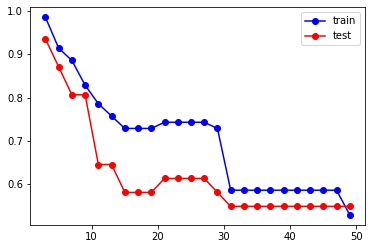

In [47]:
# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")
plt.legend(["train","test"])

In [48]:
# For k=3

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
predict=knn.predict(X_test)

In [52]:
predict

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7, 6, 6, 1, 1, 2], dtype=int64)

In [53]:
knn.score(X_train,y_train)

0.9857142857142858

In [54]:
knn.score(X_test,y_test)

0.9354838709677419

In [58]:
# For k= 5

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
predict

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7, 6, 6, 1, 1, 2], dtype=int64)

In [64]:
knn.score(X_train,y_train)

0.9142857142857143

In [65]:
knn.score(X_test,y_test)

0.8709677419354839

## k=3 gives accurate results

In [66]:
#Confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
y_pred = knn.predict(X_test)

In [69]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  2]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       1.00      0.50      0.67         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.87        31
   macro avg       0.76      0.73      0.72        31
weighted avg       0.91      0.87      0.87        31

